In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [69]:
df = pd.read_csv('../outputs/cleaned_dataset.csv')

In [70]:
df.head()

,projectid,teacher_referred_count,total_price_excluding_optional_support,students_reached,fully_funded,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,school_metro_rural,...,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors
0,1f405ea5b8ae8935a4169bdb56006b18,0.0,200.58,25.0,1.0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,78aff5ef5f3fb719258f4b4b78e2a796,0.0,653.90,40.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,f97f06a8870006b3446970f439d2c9a5,0.0,189.65,150.0,0.0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,526ce27786cc4c18d9e7ba0969552da4,1.0,544.60,28.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,a3c11154a7c261614812d9dc4f4ddee7,0.0,740.40,250.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [71]:
df[df['poverty_level_high poverty'] == True].fully_funded.value_counts()

fully_funded
1.0    6535
0.0    2601
Name: count, dtype: int64

In [72]:
df[df['poverty_level_highest poverty'] == True].fully_funded.value_counts()

fully_funded
1.0    48528
0.0    14343
Name: count, dtype: int64

In [73]:
df[df['poverty_level_moderate poverty'] == True].fully_funded.value_counts()

fully_funded
1.0    3084
0.0    1799
Name: count, dtype: int64

In [74]:
df[df['poverty_level_low poverty'] == True].fully_funded.value_counts()

fully_funded
1.0    633
0.0    278
Name: count, dtype: int64

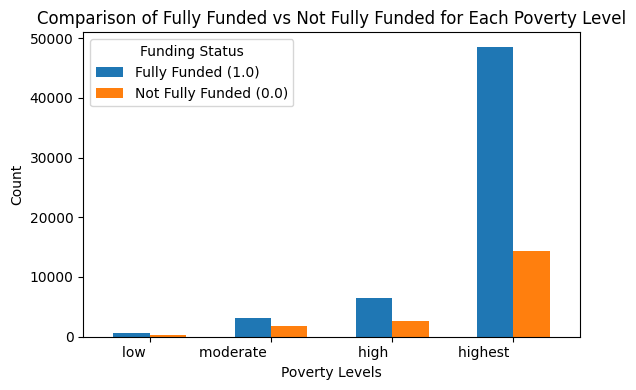

In [75]:

poverty_columns = ['poverty_level_low poverty', 'poverty_level_moderate poverty',
                 'poverty_level_high poverty', 'poverty_level_highest poverty']
fully_funded_counts = {}

for col in poverty_columns:
    # Count how many entries are fully funded (1.0) and not fully funded (0.0)
    funded_count = df[(df[col] == True) & (df['fully_funded'] == 1.0)].shape[0]
    not_funded_count = df[(df[col] == True) & (df['fully_funded'] == 0.0)].shape[0]
    fully_funded_counts[col] = {'Fully Funded (1.0)': funded_count, 'Not Fully Funded (0.0)': not_funded_count}

results_df = pd.DataFrame.from_dict(fully_funded_counts, orient='index')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
results_df.plot(kind='bar', width=0.6, ax=ax)

ax.set_xlabel('Poverty Levels')
ax.set_ylabel('Count')
ax.set_title('Comparison of Fully Funded vs Not Fully Funded for Each Poverty Level')
cleaned_labels = [label.replace('poverty_level_', '').replace('poverty', '') for label in results_df.index]

# Set the cleaned labels to the x-axis
ax.set_xticklabels(cleaned_labels, rotation=0, ha='right')

ax.legend(title='Funding Status')

# Adjust layout and save the figure
plt.tight_layout()
fig.savefig('../figures/original.png', bbox_inches='tight', dpi=300)

In [76]:
results_df.index.values

array(['poverty_level_low poverty', 'poverty_level_moderate poverty',
       'poverty_level_high poverty', 'poverty_level_highest poverty'],
      dtype=object)

In [77]:
print(results_df)

                                Fully Funded (1.0)  Not Fully Funded (0.0)
poverty_level_low poverty                      633                     278
poverty_level_moderate poverty                3084                    1799
poverty_level_high poverty                    6535                    2601
poverty_level_highest poverty                48528                   14343


### SMOTE 

In [78]:
smote = SMOTE(random_state=42)

In [79]:
balanced_dfs = {key:[] for key in poverty_columns}
for level in poverty_columns:
    poverty_subset = df[df[level] == True]

    X = poverty_subset.drop(columns=['fully_funded', 'projectid', *poverty_columns])  # Drop target and poverty level indicators
    y = poverty_subset['fully_funded']
    print(X.shape)

    if y.nunique() == 2:
        X_resampled, y_resampled = smote.fit_resample(X, y)
    
        balanced_poverty_df = pd.DataFrame(X_resampled, columns=X.columns)
        balanced_poverty_df['fully_funded'] = y_resampled

        balanced_dfs[level] = balanced_poverty_df
    else:
        balanced_dfs.append(poverty_subset)

(911, 43)
(4883, 43)
(9136, 43)
(62871, 43)


In [80]:
level

'poverty_level_highest poverty'

In [81]:
balanced_dfs[level]

,teacher_referred_count,total_price_excluding_optional_support,students_reached,school_metro_rural,school_metro_suburban,school_metro_urban,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,...,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,fully_funded
0,0.0,200.580000,25.000000,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,1.0
1,0.0,189.650000,150.000000,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,0.0
2,1.0,273.020000,25.000000,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,1.0
3,1.0,804.440000,30.000000,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1.0
4,0.0,261.870000,22.000000,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97051,0.0,519.413284,14.560558,False,False,True,True,False,False,False,...,True,False,False,True,False,True,False,False,False,0.0
97052,0.0,0.000000,0.000000,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,0.0
97053,0.0,462.106542,141.121493,False,False,True,True,True,False,False,...,False,False,False,False,False,True,True,False,False,0.0
97054,0.0,351.380949,25.000000,False,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,False,0.0


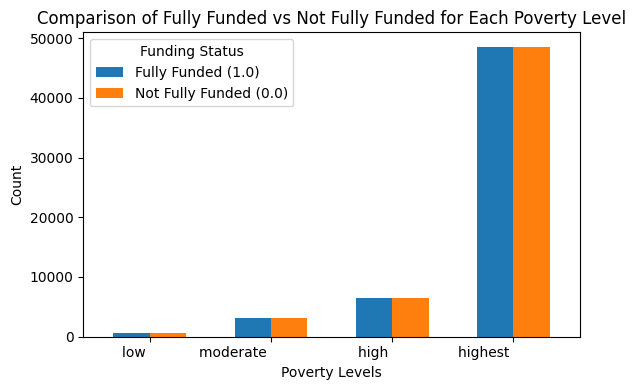

In [82]:

fully_funded_counts_2 = {}

for col in poverty_columns:
    # Count how many entries are fully funded (1.0) and not fully funded (0.0)
    funded_count = balanced_dfs[col][(balanced_dfs[col]['fully_funded'] == 1.0)].shape[0]
    not_funded_count = balanced_dfs[col][(balanced_dfs[col]['fully_funded'] == 0.0)].shape[0]
    fully_funded_counts_2[col] = {'Fully Funded (1.0)': funded_count, 'Not Fully Funded (0.0)': not_funded_count}

results_df_2 = pd.DataFrame.from_dict(fully_funded_counts_2, orient='index')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# Plot side-by-side bar charts
results_df_2.plot(kind='bar', width=0.6, ax=ax)

ax.set_xlabel('Poverty Levels')
ax.set_ylabel('Count')
ax.set_title('Comparison of Fully Funded vs Not Fully Funded for Each Poverty Level')
cleaned_labels = [label.replace('poverty_level_', '').replace('poverty', '') for label in results_df.index]

# Set the cleaned labels to the x-axis
ax.set_xticklabels(cleaned_labels, rotation=0, ha='right')

ax.legend(title='Funding Status')

# Adjust layout and save the figure
plt.tight_layout()
fig.savefig('../figures/smote.png', bbox_inches='tight', dpi=300)
